In [187]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import csv

# 读取已填充空缺值的数据集Wine-review-130k

In [188]:
data = pd.read_csv('E:/mining_frequent_patterns/wine_130k/winemag-data-130k-v3.csv', encoding='utf-8')
path = 'E:/mining_frequent_patterns/wine_130k/'
if not os.path.exists(path):
    os.makedirs(path)

In [189]:
def apriori(series, _minSup, _sum):
    attr_value = []
    attr_freq = []
    for values, keys in zip(series.values, series.index):
        if values / _sum >= _minSup:
            attr_value.append([str(keys)])
            
            attr_freq.append(values/_sum)
        else:
            break
    return attr_value, attr_freq

def find_freq(key_set, _sumSup, _sum):
    _node_list = []
    _node_freq = []
    for _key in key_set:
        cnt = 0
        for _item in data_list:
            has_flag = True
            for k in _key:
                if k not in _item:
                    has_flag = False
                    break
            if has_flag:
                cnt += 1
        if cnt / _sum >= _sumSup:
            _node_list.append(_key)
            _node_freq.append(cnt/_sum)
    return _node_list, _node_freq

# 把pandas数据转化为列表形式，便于关联规则挖掘

In [190]:
data_list = data.values.tolist()
data_sum = len(data_list)
candidate_node = []
candidate_freq = []
all_keys = []
all_freq = []
minSup = 0.05

# 找出频繁项集

## 得到频繁一项集

In [191]:
K = 0
_candidate_node, _candidate_node_freq = apriori(data['country'].value_counts(sort=True), minSup, data_sum)
if len(_candidate_node):
    K += 1
all_keys = all_keys + _candidate_node
all_freq = all_freq + _candidate_node_freq
candidate_node = candidate_node + _candidate_node
candidate_freq = candidate_freq + _candidate_node_freq

_candidate_node, _candidate_node_freq = apriori(data['points'].value_counts(sort=True), minSup, data_sum)
if len(_candidate_node):
    K += 1
all_keys = all_keys + _candidate_node
all_freq = all_freq + _candidate_node_freq
candidate_node = candidate_node + _candidate_node
candidate_freq = candidate_freq + _candidate_node_freq

_candidate_node, _candidate_node_freq = apriori(data['price'].value_counts(sort=True), minSup, data_sum)
if len(_candidate_node):
    K += 1
all_keys = all_keys + _candidate_node
all_freq = all_freq + _candidate_node_freq
candidate_node = candidate_node + _candidate_node
candidate_freq = candidate_freq + _candidate_node_freq

_candidate_node, _candidate_node_freq = apriori(data['province'].value_counts(sort=True), minSup, data_sum)
if len(_candidate_node):
    K += 1
all_keys = all_keys + _candidate_node
all_freq = all_freq + _candidate_node_freq
candidate_node = candidate_node + _candidate_node
candidate_freq = candidate_freq + _candidate_node_freq

_candidate_node, _candidate_node_freq = apriori(data['region_1'].value_counts(sort=True), minSup, data_sum)
if len(_candidate_node):
    K += 1
all_keys = all_keys + _candidate_node
all_freq = all_freq + _candidate_node_freq
candidate_node = candidate_node + _candidate_node
candidate_freq = candidate_freq + _candidate_node_freq

_candidate_node, _candidate_node_freq = apriori(data['taster_name'].value_counts(sort=True), minSup, data_sum)
if len(_candidate_node):
    K += 1
all_keys = all_keys + _candidate_node
all_freq = all_freq + _candidate_node_freq
candidate_node = candidate_node + _candidate_node
candidate_freq = candidate_freq + _candidate_node_freq

_candidate_node, _candidate_node_freq = apriori(data['variety'].value_counts(sort=True), minSup, data_sum)
if len(_candidate_node):
    K += 1
all_keys = all_keys + _candidate_node
all_freq = all_freq + _candidate_node_freq
candidate_node = candidate_node + _candidate_node
candidate_freq = candidate_freq + _candidate_node_freq

_candidate_node, _candidate_node_freq = apriori(data['winery'].value_counts(sort=True), minSup, data_sum)
if len(_candidate_node):
    K += 1
all_keys = all_keys + _candidate_node
all_freq = all_freq + _candidate_node_freq
candidate_node = candidate_node + _candidate_node
candidate_freq = candidate_freq + _candidate_node_freq
k=1
print(k, ' iterm frequent pattern:', len(candidate_node), ' frequent pattern has been found')

1  iterm frequent pattern: 28  frequent pattern has been found


## 使用迭代的方法求频繁k+1项集

In [192]:
key_set = []
while len(candidate_node) and k < K:
    for i in range(len(candidate_node)):
        for j in range(len(candidate_node)):
            if i >=j:
                continue
            k_plus_1_node = list(set(candidate_node[i]+candidate_node[j]))
            k_plus_1_node.sort()
            if len(k_plus_1_node) == k+1 and k_plus_1_node not in key_set:  
                key_set.append(k_plus_1_node)
    k += 1
    print(k, ' item frequent pattern:', len(key_set),  ' candidate pattern has been found')
    _candidate_node, _candidate_node_freq = find_freq(key_set, minSup, data_sum)
    print(k, ' iterm frequent pattern:', len(_candidate_node), ' frequent pattern has been found')
    key_set = []
    all_keys = all_keys + _candidate_node
    all_freq = all_freq + _candidate_node_freq
    candidate_node = _candidate_node

2  item frequent pattern: 378  candidate pattern has been found
2  iterm frequent pattern: 16  frequent pattern has been found
3  item frequent pattern: 42  candidate pattern has been found
3  iterm frequent pattern: 4  frequent pattern has been found
4  item frequent pattern: 6  candidate pattern has been found
4  iterm frequent pattern: 0  frequent pattern has been found


输出所有查找到的频繁项集，并把结果保存在csv文件中

In [193]:
print('All frequent patterns')

file_name = path+'all_frequent_patterns.csv'
print(file_name)

if os.path.exists(file_name):
    f = open(path+'all_frequent_patterns.csv', 'w', newline='')
else:
    f = open(path+'all_frequent_patterns.csv', 'a', newline='')
csv_writer = csv.writer(f)
csv_writer.writerow(['pattern', 'frequency'])
for _keys, _freq in zip(all_keys, all_freq):
    print(_keys, _freq)
    csv_writer.writerow([_keys, _freq])
f.close()
    

All frequent patterns
E:/mining_frequent_patterns/wine_130k/all_frequent_patterns.csv
['US'] 0.4195320494571866
['France'] 0.17003023751452248
['Italy'] 0.15041047618314854
['Spain'] 0.05114987189449954
['88'] 0.13239107185449062
['87'] 0.13028290926437436
['90'] 0.11856491063391064
['86'] 0.09694470304914173
['89'] 0.09406713805387355
['91'] 0.08739641920120643
['92'] 0.07396265320725393
['85'] 0.07332404921097783
['20.0'] 0.057835978795269714
['15.0'] 0.05079594678812966
['California'] 0.2790776403967039
['Washington'] 0.06646867378107424
['Roger Voss'] 0.19866739503427688
['Kerin O’Keefe'] 0.1453016442129398
['Virginie Boone'] 0.1423394449531049
['Michael Schachner'] 0.11875726123519863
['Matt Kettmann'] 0.08411107093120773
['Paul Gregutt'] 0.07568611459479423
['Jim Gordon'] 0.05186541613129082
['Pinot Noir'] 0.10211508721176263
['Chardonnay'] 0.09042786467750498
['Cabernet Sauvignon'] 0.07287779581598972
['Red Blend'] 0.06883073916489063
['Bordeaux-style Red Blend'] 0.0532041763162

# 导出关联规则到wine_130k/association.csv，并计算支持度和置信度

In [194]:
import copy
wine_dict = {}
file_name = path+'association.csv'
print(file_name)
confidence_list = []
association_list = []
support_list = []
if os.path.exists(file_name):
    f = open(path+'association.csv', 'w', newline='')
else:
    f = open(path+'association.csv', 'a', newline='')
csv_writer = csv.writer(f)
csv_writer.writerow(['key1', 'key2', 'confidence', 'support' ])
for _keys, _freq in zip(all_keys, all_freq):
    wine_dict[str(_keys)] = _freq
    if len(_keys) == 1:
        continue
    for i in range(len(_keys)):
        tmp_list = copy.deepcopy(_keys)
        key1 = [_keys[i]]
        tmp_list.remove(_keys[i])
        key2 = tmp_list
        if str(key1)+'-->'+str(key2) in association_list:
            continue
        confidence1 = _freq / wine_dict[str(key1)]
        print(key1, '-->', key2, ', confidence is ', confidence1, ', support is ', _freq)
        confidence_list.append(confidence1)
        association_list.append(str(key1)+'-->'+str(key2))
        support_list.append(_freq)
        csv_writer.writerow([key1, key2, confidence1,  _freq])
f.close()

E:/mining_frequent_patterns/wine_130k/association.csv
['California'] --> ['US'] , confidence is  0.9998621526246139 , support is  0.27903917027644626
['US'] --> ['California'] , confidence is  0.6651200322775872 , support is  0.27903917027644626
['US'] --> ['Washington'] , confidence is  0.15856364736735928 , support is  0.06652253194943487
['Washington'] --> ['US'] , confidence is  1.000810278967473 , support is  0.06652253194943487
['US'] --> ['Virginie Boone'] , confidence is  0.3386762521319714 , support is  0.1420855421594048
['Virginie Boone'] --> ['US'] , confidence is  0.9982162162162164 , support is  0.1420855421594048
['Matt Kettmann'] --> ['US'] , confidence is  0.9986278814489572 , support is  0.08399566057043495
['US'] --> ['Matt Kettmann'] , confidence is  0.200212738643241 , support is  0.08399566057043495
['Paul Gregutt'] --> ['US'] , confidence is  0.9724509504930364 , support is  0.07360103407683252
['US'] --> ['Paul Gregutt'] , confidence is  0.17543602252095292 , su

# 对规则进行评价和分析

## 使用Lift规则对关联关系进行评价和分析 

结果保存在fig_130k/evaluation.csv中

In [195]:
file_name = path+'evaluation.csv'
print(file_name)
if os.path.exists(file_name):
    f = open(path+'evaluation.csv', 'w', newline='')
else:
    f = open(path+'evaluation.csv', 'a', newline='')
csv_writer = csv.writer(f)
csv_writer.writerow(['Lift evaluation'])
csv_writer.writerow(['key1', 'key2', 'lift' ])
lift_list = []
lift_name = []
for _keys, _freq in zip(all_keys, all_freq):
    if len(_keys) == 1:
        continue
    for i in range(len(_keys)):
        tmp_list = copy.deepcopy(_keys)
        key1 = [_keys[i]]
        tmp_list.remove(_keys[i])
        tmp_list.sort()
        key2 = tmp_list
        if str(key1)+"-->"+str(key2) in lift_name:
            continue
        lift = _freq / wine_dict[str(key1)] / wine_dict[str(key2)]  
        print(key1, '-->', key2, ', lift is ', lift)
        lift_name.append(str(key1)+"-->"+str(key2))
        lift_list.append(lift)
        csv_writer.writerow([str(key1)+"-->"+str(key2), lift])

E:/mining_frequent_patterns/wine_130k/evaluation.csv
['California'] --> ['US'] , lift is  2.3832795466241254
['US'] --> ['California'] , lift is  2.3832795466241254
['US'] --> ['Washington'] , lift is  2.3855395082744595
['Washington'] --> ['US'] , lift is  2.3855395082744595
['US'] --> ['Virginie Boone'] , lift is  2.3793562792348357
['Virginie Boone'] --> ['US'] , lift is  2.3793562792348353
['Matt Kettmann'] --> ['US'] , lift is  2.380337527826626
['US'] --> ['Matt Kettmann'] , lift is  2.380337527826626
['Paul Gregutt'] --> ['US'] , lift is  2.3179419826238457
['US'] --> ['Paul Gregutt'] , lift is  2.3179419826238457
['Jim Gordon'] --> ['US'] , lift is  2.376889747465484
['US'] --> ['Jim Gordon'] , lift is  2.376889747465484
['Pinot Noir'] --> ['US'] , lift is  1.7812406074121383
['US'] --> ['Pinot Noir'] , lift is  1.7812406074121383
['Chardonnay'] --> ['US'] , lift is  1.3805173553925265
['US'] --> ['Chardonnay'] , lift is  1.3805173553925267
['Cabernet Sauvignon'] --> ['US'] , l

In [196]:
indexes = np.argsort(lift_list)
indexes = list(reversed(indexes))
for i in range(6):
    _index = indexes[i]
    print(lift_name[_index], ' lift is ', lift_list[_index])

['Spain']-->['Michael Schachner']  lift is  8.43700389272665
['Michael Schachner']-->['Spain']  lift is  8.43700389272665
['Kerin O’Keefe']-->['Italy']  lift is  6.646360764874611
['Italy']-->['Kerin O’Keefe']  lift is  6.646360764874611
['Roger Voss']-->['France']  lift is  4.278701410124298
['France']-->['Roger Voss']  lift is  4.278701410124297


输出前6位的关联关系，可以看出，

['Spain', 'Michael Schachner'] 

['Italy', 'Kerin O’Keefe']

['France', 'Roger Voss'] 

这3条记录的lift值较高，分别是8.4，6.6，4.3。
这三条记录都是country和taster_name之间的关联关系，可以分析出，也许Michael Schachner是西班牙人，所以他能更方便的喝到西班牙产出的葡萄酒，所以Michael Schachner和Spain的关联程度高。也可能是因为Michael Schachner对于西班牙产出的就有偏好，或者是较为了解，所以对于西班牙产出的葡萄酒评价的更多。

## 使用Cosine规则对关联关系进行评价和分析

结果保存在fig_130k/evaluation.csv中

In [197]:
csv_writer.writerow(['Cosine evaluation'])
csv_writer.writerow(['key1', 'key2', 'cosine' ])
cos_list = []
cos_name = []
for _keys, _freq in zip(all_keys, all_freq):
    if len(_keys) == 1:
        continue
    for i in range(len(_keys)):
        tmp_list = copy.deepcopy(_keys)
        key1 = [_keys[i]]
        tmp_list.remove(_keys[i])
        tmp_list.sort()
        key2 = tmp_list
        if str(key1)+"-->"+str(key2) in cos_name:
            continue
        cos = _freq / np.sqrt(wine_dict[str(key1)]*wine_dict[str(key2)])  
        print(key1, '-->', key2, ', cosine is ', cos)
        cos_name.append(str(key1)+"-->"+str(key2))
        cos_list.append(cos)
        csv_writer.writerow([str(key1)+"-->"+str(key2), cos])
f.close()

['California'] --> ['US'] , cosine is  0.8154927021297131
['US'] --> ['California'] , cosine is  0.8154927021297131
['US'] --> ['Washington'] , cosine is  0.39836180559364237
['Washington'] --> ['US'] , cosine is  0.39836180559364237
['US'] --> ['Virginie Boone'] , cosine is  0.5814397018827195
['Virginie Boone'] --> ['US'] , cosine is  0.5814397018827195
['Matt Kettmann'] --> ['US'] , cosine is  0.4471442977724232
['US'] --> ['Matt Kettmann'] , cosine is  0.4471442977724232
['Paul Gregutt'] --> ['US'] , cosine is  0.41304107162753007
['US'] --> ['Paul Gregutt'] , cosine is  0.41304107162753007
['Jim Gordon'] --> ['US'] , cosine is  0.35061504069233074
['US'] --> ['Jim Gordon'] , cosine is  0.35061504069233074
['Pinot Noir'] --> ['US'] , cosine is  0.36868045552696266
['US'] --> ['Pinot Noir'] , cosine is  0.36868045552696266
['Chardonnay'] --> ['US'] , cosine is  0.2688905754028465
['US'] --> ['Chardonnay'] , cosine is  0.2688905754028465
['Cabernet Sauvignon'] --> ['US'] , cosine is 

In [198]:
indexes = np.argsort(cos_list)
indexes = list(reversed(indexes))
for i in range(6):
    _index = indexes[i]
    print(cos_name[_index], ' cosine is ', cos_list[_index])

['Kerin O’Keefe']-->['Italy']  cosine is  0.9825580510133604
['Italy']-->['Kerin O’Keefe']  cosine is  0.9825580510133604
['US']-->['California']  cosine is  0.8154927021297131
['California']-->['US']  cosine is  0.8154927021297131
['Roger Voss']-->['France']  cosine is  0.7863906833320243
['France']-->['Roger Voss']  cosine is  0.7863906833320243


输出前6位的关联关系，可以看出，
前6位的关联关系分别为：
['Italy']-->['Kerin O’Keefe']
['Kerin O’Keefe']-->['Italy']
['US']-->['California']
['California']-->['US']
['France']-->['Roger Voss']
['Roger Voss']-->['France']
这6条关联关系的cosine值较高，分别是0.98, 0.98, 0.82, 0.82, 0.79, 0.79。可以看出，除了葡萄酒的产地和taster_name之间的关系，还有country和province之间的关系。比如对于关联关系['US']-->['California']，可以推断出，大部分来自美国的酒都产于California省。

# 可视化展示 

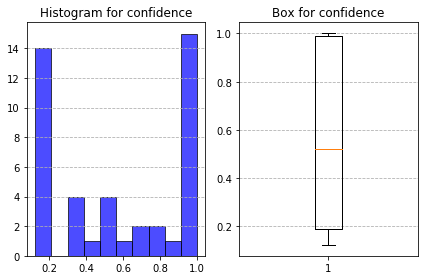

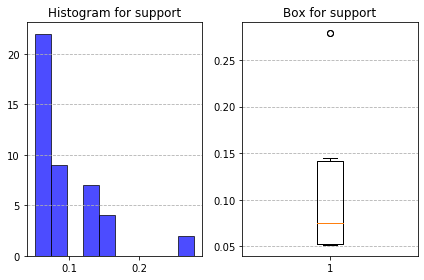

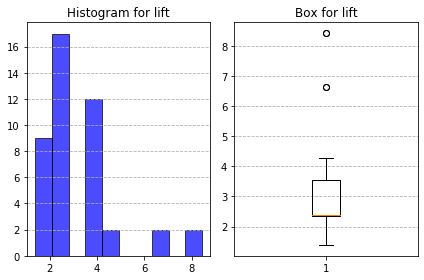

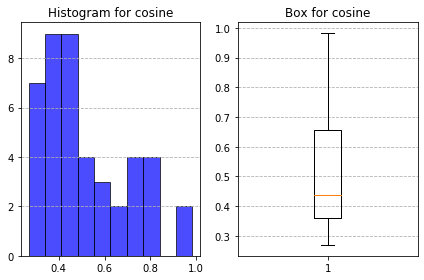

In [201]:
def my_plot(_num_data, _title):
    plt.clf()
    plt.subplot(121)
    plt.hist(_num_data, bins=10, density=0, facecolor="blue", edgecolor="black", alpha=0.7)
    plt.title('Histogram for '+_title)
    plt.grid(axis='y', linestyle='--')
    plt.tight_layout()
    
    plt.subplot(122)
    plt.boxplot(_num_data, notch=False, sym='o', vert=True)
    plt.title('Box for '+_title)
    plt.grid(axis='y', linestyle='--')
    plt.tight_layout()
    plt.show()
#     plt.savefig(path + _title + '.jpg')
my_plot(confidence_list, 'confidence')
my_plot(support_list, 'support')
my_plot(lift_list, 'lift')
my_plot(cos_list, 'cosine')

# 七、对wine_150k数据集进行可视化

因为上文已经对wine_130k数据集进行了详细的分析及可视化，本段不再做重复工作，仅给出wine_150ks数据集的代码及可视化结果

In [202]:
data = pd.read_csv('E:/pycharmProject/data_visualization/fig_150k/similarity/wine-150k-v2.csv', encoding='utf-8')
path = 'E:/mining_frequent_patterns/wine_150k/'
if not os.path.exists(path):
    os.makedirs(path)
data_list = data.values.tolist()
data_sum = len(data_list)
candidate_node = []
candidate_freq = []
all_keys = []
all_freq = []
minSup = 0.05
K = 0
_candidate_node, _candidate_node_freq = apriori(data['country'].value_counts(sort=True), minSup, data_sum)
if len(_candidate_node):
    K += 1
all_keys = all_keys + _candidate_node
all_freq = all_freq + _candidate_node_freq
candidate_node = candidate_node + _candidate_node
candidate_freq = candidate_freq + _candidate_node_freq

_candidate_node, _candidate_node_freq = apriori(data['points'].value_counts(sort=True), minSup, data_sum)
if len(_candidate_node):
    K += 1
all_keys = all_keys + _candidate_node
all_freq = all_freq + _candidate_node_freq
candidate_node = candidate_node + _candidate_node
candidate_freq = candidate_freq + _candidate_node_freq

_candidate_node, _candidate_node_freq = apriori(data['price'].value_counts(sort=True), minSup, data_sum)
if len(_candidate_node):
    K += 1
all_keys = all_keys + _candidate_node
all_freq = all_freq + _candidate_node_freq
candidate_node = candidate_node + _candidate_node
candidate_freq = candidate_freq + _candidate_node_freq

_candidate_node, _candidate_node_freq = apriori(data['province'].value_counts(sort=True), minSup, data_sum)
if len(_candidate_node):
    K += 1
all_keys = all_keys + _candidate_node
all_freq = all_freq + _candidate_node_freq
candidate_node = candidate_node + _candidate_node
candidate_freq = candidate_freq + _candidate_node_freq

_candidate_node, _candidate_node_freq = apriori(data['region_1'].value_counts(sort=True), minSup, data_sum)
if len(_candidate_node):
    K += 1
all_keys = all_keys + _candidate_node
all_freq = all_freq + _candidate_node_freq
candidate_node = candidate_node + _candidate_node
candidate_freq = candidate_freq + _candidate_node_freq

_candidate_node, _candidate_node_freq = apriori(data['variety'].value_counts(sort=True), minSup, data_sum)
if len(_candidate_node):
    K += 1
all_keys = all_keys + _candidate_node
all_freq = all_freq + _candidate_node_freq
candidate_node = candidate_node + _candidate_node
candidate_freq = candidate_freq + _candidate_node_freq

_candidate_node, _candidate_node_freq = apriori(data['winery'].value_counts(sort=True), minSup, data_sum)
if len(_candidate_node):
    K += 1
all_keys = all_keys + _candidate_node
all_freq = all_freq + _candidate_node_freq
candidate_node = candidate_node + _candidate_node
candidate_freq = candidate_freq + _candidate_node_freq
k=1
print(k, ' iterm frequent pattern:', len(candidate_node), ' frequent pattern has been found')
key_set = []
while len(candidate_node) and k < K:
    for i in range(len(candidate_node)):
        for j in range(len(candidate_node)):
            if i >=j:
                continue
            k_plus_1_node = list(set(candidate_node[i]+candidate_node[j]))
            k_plus_1_node.sort()
            if len(k_plus_1_node) == k+1 and k_plus_1_node not in key_set:  
                key_set.append(k_plus_1_node)
    k += 1
    print(k, ' item frequent pattern:', len(key_set),  ' candidate pattern has been found')
    _candidate_node, _candidate_node_freq = find_freq(key_set, minSup, data_sum)
    print(k, ' iterm frequent pattern:', len(_candidate_node), ' frequent pattern has been found')
    key_set = []
    all_keys = all_keys + _candidate_node
    all_freq = all_freq + _candidate_node_freq
    candidate_node = _candidate_node

1  iterm frequent pattern: 22  frequent pattern has been found
2  item frequent pattern: 231  candidate pattern has been found
2  iterm frequent pattern: 7  frequent pattern has been found
3  item frequent pattern: 11  candidate pattern has been found
3  iterm frequent pattern: 1  frequent pattern has been found
4  item frequent pattern: 0  candidate pattern has been found
4  iterm frequent pattern: 0  frequent pattern has been found


In [203]:
file_name = path+'all_frequent_patterns.csv'
print(file_name)

if os.path.exists(file_name):
    f = open(path+'all_frequent_patterns.csv', 'w', newline='')
else:
    f = open(path+'all_frequent_patterns.csv', 'a', newline='')
csv_writer = csv.writer(f)
csv_writer.writerow(['pattern', 'frequency'])
for _keys, _freq in zip(all_keys, all_freq):
    print(_keys, _freq)
    csv_writer.writerow([_keys, _freq])
f.close()

E:/mining_frequent_patterns/wine_150k/all_frequent_patterns.csv
['US'] 0.4134366925064599
['Italy'] 0.1555621811435765
['France'] 0.13978665606572582
['Spain'] 0.05478036175710594
['87'] 0.137461074670377
['88'] 0.1184058835221626
['90'] 0.10583051745842444
['86'] 0.10318028225004969
['89'] 0.08560922281852515
['85'] 0.08223017292784734
['84'] 0.07094679652819187
['91'] 0.06980719538859073
['92'] 0.061227058901477505
['20.0'] 0.05744384814152256
['15.0'] 0.05142781421851189
['California'] 0.2948982972238786
['Washington'] 0.06459948320413436
['Napa Valley'] 0.05185847743987279
['Chardonnay'] 0.09595176571920758
['Pinot Noir'] 0.09468627840720864
['Cabernet Sauvignon'] 0.08480752666799178
['Red Blend'] 0.06666666666666667
['California', 'US'] 0.294964553104088
['US', 'Washington'] 0.06460610879215531
['Chardonnay', 'US'] 0.05387928178625853
['Pinot Noir', 'US'] 0.06866759424898959
['Cabernet Sauvignon', 'US'] 0.06086265156032598
['California', 'Pinot Noir'] 0.050957397469025376
['Cabern

In [204]:
wine_dict = {}
file_name = path+'association.csv'
print(file_name)
confidence_list = []
association_list = []
support_list = []
if os.path.exists(file_name):
    f = open(path+'association.csv', 'w', newline='')
else:
    f = open(path+'association.csv', 'a', newline='')
csv_writer = csv.writer(f)
csv_writer.writerow(['key1', 'key2', 'confidence', 'support' ])
for _keys, _freq in zip(all_keys, all_freq):
    wine_dict[str(_keys)] = _freq
    if len(_keys) == 1:
        continue
    for i in range(len(_keys)):
        tmp_list = copy.deepcopy(_keys)
        key1 = [_keys[i]]
        tmp_list.remove(_keys[i])
        key2 = tmp_list
        if str(key1)+'-->'+str(key2) in association_list:
            continue
        confidence1 = _freq / wine_dict[str(key1)]
        print(key1, '-->', key2, ', confidence is ', confidence1, ', support is ', _freq)
        confidence_list.append(confidence1)
        association_list.append(str(key1)+'-->'+str(key2))
        support_list.append(_freq)
        csv_writer.writerow([key1, key2, confidence1,  _freq])
f.close()

E:/mining_frequent_patterns/wine_150k/association.csv
['California'] --> ['US'] , confidence is  1.0002246736615066 , support is  0.294964553104088
['US'] --> ['California'] , confidence is  0.7134455128205128 , support is  0.294964553104088
['US'] --> ['Washington'] , confidence is  0.15626602564102565 , support is  0.06460610879215531
['Washington'] --> ['US'] , confidence is  1.0001025641025643 , support is  0.06460610879215531
['Chardonnay'] --> ['US'] , confidence is  0.5615246512912582 , support is  0.05387928178625853
['US'] --> ['Chardonnay'] , confidence is  0.13032051282051282 , support is  0.05387928178625853
['Pinot Noir'] --> ['US'] , confidence is  0.7252116716814778 , support is  0.06866759424898959
['US'] --> ['Pinot Noir'] , confidence is  0.16608974358974357 , support is  0.06866759424898959
['Cabernet Sauvignon'] --> ['US'] , confidence is  0.71765625 , support is  0.06086265156032598
['US'] --> ['Cabernet Sauvignon'] , confidence is  0.14721153846153848 , support is

In [205]:
file_name = path+'evaluation.csv'
print(file_name)
if os.path.exists(file_name):
    f = open(path+'evaluation.csv', 'w', newline='')
else:
    f = open(path+'evaluation.csv', 'a', newline='')
csv_writer = csv.writer(f)
csv_writer.writerow(['Lift evaluation'])
csv_writer.writerow(['key1', 'key2', 'lift' ])
lift_list = []
lift_name = []
for _keys, _freq in zip(all_keys, all_freq):
    if len(_keys) == 1:
        continue
    for i in range(len(_keys)):
        tmp_list = copy.deepcopy(_keys)
        key1 = [_keys[i]]
        tmp_list.remove(_keys[i])
        tmp_list.sort()
        key2 = tmp_list
        if str(key1)+"-->"+str(key2) in lift_name:
            continue
        lift = _freq / wine_dict[str(key1)] / wine_dict[str(key2)]  
        print(key1, '-->', key2, ', lift is ', lift)
        lift_name.append(str(key1)+"-->"+str(key2))
        lift_list.append(lift)
        csv_writer.writerow([str(key1)+"-->"+str(key2), lift])

E:/mining_frequent_patterns/wine_150k/evaluation.csv
['California'] --> ['US'] , lift is  2.419293429418769
['US'] --> ['California'] , lift is  2.419293429418769
['US'] --> ['Washington'] , lift is  2.4189980769230774
['Washington'] --> ['US'] , lift is  2.4189980769230774
['Chardonnay'] --> ['US'] , lift is  1.3581877503107307
['US'] --> ['Chardonnay'] , lift is  1.3581877503107307
['Pinot Noir'] --> ['US'] , lift is  1.7541057308795747
['US'] --> ['Pinot Noir'] , lift is  1.7541057308795744
['Cabernet Sauvignon'] --> ['US'] , lift is  1.7358310546875
['US'] --> ['Cabernet Sauvignon'] , lift is  1.7358310546875002
['California'] --> ['Pinot Noir'] , lift is  1.8249372134116753
['Pinot Noir'] --> ['California'] , lift is  1.8249372134116755
['Cabernet Sauvignon'] --> ['California'] , lift is  2.0075777160237256
['California'] --> ['Cabernet Sauvignon'] , lift is  2.007577716023726
['California'] --> ['Pinot Noir', 'US'] , lift is  2.502678090968276
['Pinot Noir'] --> ['California', 'U

In [183]:
csv_writer.writerow(['Cosine evaluation'])
csv_writer.writerow(['key1', 'key2', 'cosine' ])
cos_list = []
cos_name = []
for _keys, _freq in zip(all_keys, all_freq):
    if len(_keys) == 1:
        continue
    for i in range(len(_keys)):
        tmp_list = copy.deepcopy(_keys)
        key1 = [_keys[i]]
        tmp_list.remove(_keys[i])
        tmp_list.sort()
        key2 = tmp_list
        if str(key1)+"-->"+str(key2) in cos_name:
            continue
        cos = _freq / np.sqrt(wine_dict[str(key1)]*wine_dict[str(key2)])  
        print(key1, '-->', key2, ', cosine is ', cos)
        cos_name.append(str(key1)+"-->"+str(key2))
        cos_list.append(cos)
        csv_writer.writerow([str(key1)+"-->"+str(key2), cos])
f.close()

['California'] --> ['US'] , cosine is  0.8447519193444687
['US'] --> ['California'] , cosine is  0.8447519193444687
['US'] --> ['Washington'] , cosine is  0.39532524954233167
['Washington'] --> ['US'] , cosine is  0.39532524954233167
['Chardonnay'] --> ['US'] , cosine is  0.27051465860029916
['US'] --> ['Chardonnay'] , cosine is  0.27051465860029916
['Pinot Noir'] --> ['US'] , cosine is  0.3470593905916766
['US'] --> ['Pinot Noir'] , cosine is  0.3470593905916766
['Cabernet Sauvignon'] --> ['US'] , cosine is  0.32503427611413305
['US'] --> ['Cabernet Sauvignon'] , cosine is  0.32503427611413305
['California'] --> ['Pinot Noir'] , cosine is  0.3049492596151601
['Pinot Noir'] --> ['California'] , cosine is  0.3049492596151601
['Cabernet Sauvignon'] --> ['California'] , cosine is  0.3174868176184288
['California'] --> ['Cabernet Sauvignon'] , cosine is  0.3174868176184288
['California'] --> ['Pinot Noir', 'US'] , cosine is  0.3561369543186179
['Pinot Noir'] --> ['California', 'US'] , cosi

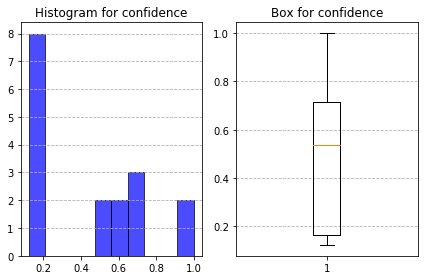

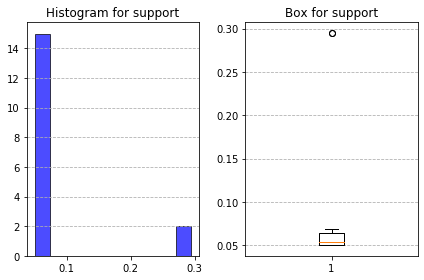

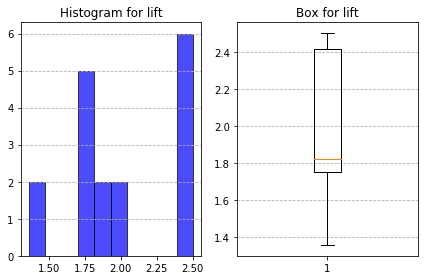

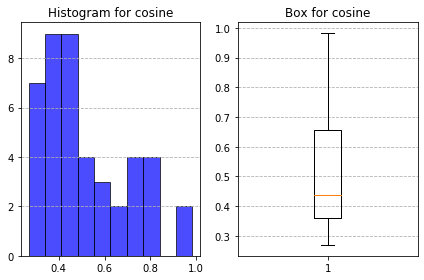

In [208]:
def my_plot1(_num_data, _title):
    plt.clf()
    plt.subplot(121)
    plt.hist(_num_data, bins=10, density=0, facecolor="blue", edgecolor="black", alpha=0.7)
    plt.title('Histogram for '+_title)
    plt.grid(axis='y', linestyle='--')
    plt.tight_layout()
    
    plt.subplot(122)
    plt.boxplot(_num_data, notch=False, sym='o', vert=True)
    plt.title('Box for '+_title)
    plt.grid(axis='y', linestyle='--')
    plt.tight_layout()
    plt.show()
#     plt.savefig(path + _title + '.jpg')
my_plot1(confidence_list, 'confidence')
my_plot1(support_list, 'support')
my_plot1(lift_list, 'lift')
my_plot1(cos_list, 'cosine')